In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import h5py
import pickle
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib
import datetime
from cartopy.feature.nightshade import Nightshade
import matplotlib.colors as mcolors
cmap = mcolors.ListedColormap(['gray', 'white'])



In [14]:
inastfilepath = r'/data/debasish/insatdata/l1b/2019/2019jan/day01/3RIMG_01JAN2019_0315_L1B_STD_V01R00.h5'
insatfile = h5py.File(inastfilepath,'r')
print(insatfile.keys())

print("File acquisition date-",insatfile.attrs['Acquisition_Date'].decode('utf-8'))
print("File acq. time (GMT)-",insatfile.attrs['Acquisition_Time_in_GMT'].decode('utf-8'))

<KeysViewHDF5 ['GeoX', 'GeoX1', 'GeoX2', 'GeoY', 'GeoY1', 'GeoY2', 'GreyCount', 'IMG_MIR', 'IMG_MIR_RADIANCE', 'IMG_MIR_TEMP', 'IMG_SWIR', 'IMG_SWIR_RADIANCE', 'IMG_TIR1', 'IMG_TIR1_RADIANCE', 'IMG_TIR1_TEMP', 'IMG_TIR2', 'IMG_TIR2_RADIANCE', 'IMG_TIR2_TEMP', 'IMG_VIS', 'IMG_VIS_ALBEDO', 'IMG_VIS_RADIANCE', 'IMG_WV', 'IMG_WV_RADIANCE', 'IMG_WV_TEMP', 'Latitude', 'Latitude_VIS', 'Latitude_WV', 'Longitude', 'Longitude_VIS', 'Longitude_WV', 'SCAN_LINE_TIME', 'Sat_Azimuth', 'Sat_Elevation', 'Sun_Azimuth', 'Sun_Elevation', 'time']>
File acquisition date- 01JAN2019
File acq. time (GMT)- 0315


01JAN2019
0315
03:15:22
03:42:16


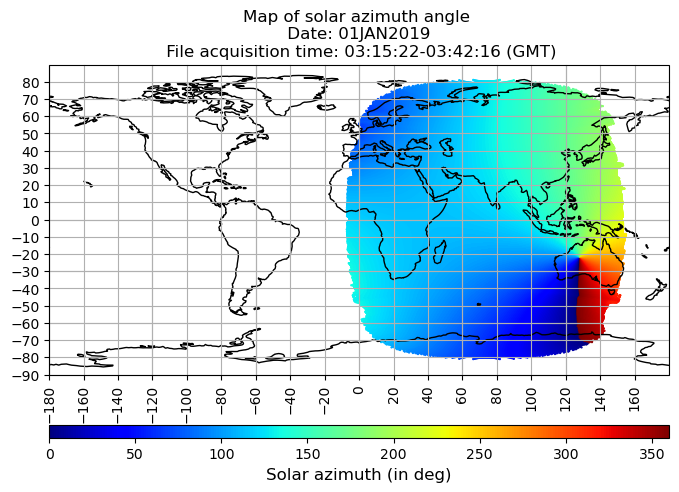

In [44]:
tir1count = np.array(insatfile['IMG_TIR1'])[0,:,:]
tir2count = np.array(insatfile['IMG_TIR2'])[0,:,:]
mircount = np.array(insatfile['IMG_MIR'])[0,:,:]
longitudearray = np.array(insatfile['Longitude'])/100
latitudearray = np.array(insatfile['Latitude'])/100
fillvalue = insatfile['Longitude'].attrs['_FillValue'][0]/100
latitudearray[latitudearray == fillvalue] = np.nan
longitudearray[longitudearray == fillvalue] = np.nan

sat_elevation = np.array(insatfile['Sat_Elevation'])/100
sat_elevation[sat_elevation == 32767/100] = np.nan
sun_elevation = np.array(insatfile['Sun_Elevation'])/100
sun_elevation[sun_elevation == 32767/100] = np.nan

sat_azimuth = np.array(insatfile['Sat_Azimuth'])/100
sat_azimuth[sat_azimuth == 65535/100] = np.nan
sun_azimuth = np.array(insatfile['Sun_Azimuth'])/100
sun_azimuth[sun_azimuth == 65535/100] = np.nan



insatdate = str(insatfile.attrs['Acquisition_Date'])[2:-1]
print(insatdate)
insattime = str(insatfile.attrs['Acquisition_Time_in_GMT'])[2:-1]
print(insattime)
acqstart = str(insatfile.attrs['Acquisition_Start_Time'])[2:-1].split('T')[1]
print(acqstart)
acqend = str(insatfile.attrs['Acquisition_End_Time'])[2:-1].split('T')[1]
print(acqend)

#Sanity check by plotting the sat_elevation and sun_elevation
extent = -1
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection = ccrs.PlateCarree())
plot = plt.scatter(longitudearray.flatten()[0:extent],latitudearray.flatten()[0:extent],
                   c=sun_azimuth.flatten()[0:extent],
                   s=0.5,cmap='jet',transform=ccrs.PlateCarree())

text = 'Map of Satellite Elevation'
ax.set_global()
ax.coastlines()
ax.gridlines()
#Make the xaxis grids denser

#Make longitude and latitude tick labels
ax.set_xticks(np.arange(-180,180,20),crs=ccrs.PlateCarree())
#Rotate xtixk labels using single line
plt.xticks(rotation = 90)

ax.set_yticks(np.arange(-90,90,10),crs=ccrs.PlateCarree())
plt.grid(True)
ax.set_title(text)

cbar = plt.colorbar(plot,orientation='horizontal',pad=0.11, fraction=0.05, aspect=50)
cbar.set_label('Solar azimuth (in deg)',fontsize=12)
plt.title('Map of solar azimuth angle \n Date: {} \n File acquisition time: {}-{} (GMT)'.format(insatdate,acqstart,acqend))
plt.show()

In [ ]:
def count2bt(count,lut):
    bt = lut[count]
    return bt

In [47]:
viscount = np.array(insatfile['IMG_VIS'])[0,:,:]
vislut = np.array(insatfile['IMG_VIS_ALBEDO'])
visfill = insatfile['IMG_VIS'].attrs['_FillValue'][0]
albedoarray = count2bt(viscount,vislut)
albedoarray[viscount == visfill] = np.nan


swircount = np.array(insatfile['IMG_SWIR'])[0,:,:]
swirlut = np.array(insatfile['IMG_SWIR_RADIANCE'])
swirfill = insatfile['IMG_SWIR'].attrs['_FillValue'][0]
swirradarray = count2bt(swircount,swirlut)
swirradarray[swircount == swirfill] = np.nan

print(viscount.shape,swircount.shape)

(11264, 11220) (11264, 11220)


In [50]:
tir1count = np.array(insatfile['IMG_TIR1'])[0,:,:]
fillvalue = insatfile['IMG_TIR1'].attrs['_FillValue'][0]
tir1lut = np.array(insatfile['IMG_TIR1_TEMP'])
tir1bt = count2bt(tir1count,tir1lut)
tir1bt[tir1count == fillvalue] = np.nan

tir2count = np.array(insatfile['IMG_TIR2'])[0,:,:]
fillvalue = insatfile['IMG_TIR2'].attrs['_FillValue'][0]
tir2lut = np.array(insatfile['IMG_TIR2_TEMP'])
tir2bt = count2bt(tir2count,tir2lut)
tir2bt[tir2count == fillvalue] = np.nan

mircount = np.array(insatfile['IMG_MIR'])[0,:,:]
fillvalue = insatfile['IMG_MIR'].attrs['_FillValue'][0]
mirlut = np.array(insatfile['IMG_MIR_TEMP'])
mirbt = count2bt(mircount,mirlut)
mirbt[mircount == fillvalue] = np.nan

swircount = np.array(insatfile['IMG_SWIR'])[0,:,:]
fillvalue = insatfile['IMG_SWIR'].attrs['_FillValue'][0]
swirlut = np.array(insatfile['IMG_SWIR_RADIANCE'])
swirrad = count2bt(swircount,swirlut)
swirrad[swircount == fillvalue] = np.nan

viscount = np.array(insatfile['IMG_VIS'])[0,:,:]
fillvalue = insatfile['IMG_VIS'].attrs['_FillValue'][0]
vislut = np.array(insatfile['IMG_VIS_ALBEDO'])
visalbedo = count2bt(viscount,vislut)
visalbedo[viscount == fillvalue] = np.nan

solarelevationarray = np.array(insatfile['Sun_Elevation'])[0,:,:]
solarelevationarray = solarelevationarray/100
fillvalue = insatfile['Sun_Elevation'].attrs['_FillValue'][0]/100
solarelevationarray[solarelevationarray == fillvalue] = np.nan

satelevationarray = np.array(insatfile['Sat_Elevation'])[0,:,:]
satelevationarray = satelevationarray/100
fillvalue = insatfile['Sat_Elevation'].attrs['_FillValue'][0]/100
satelevationarray[satelevationarray == fillvalue] = np.nan

print(solarelevationarray.shape,satelevationarray.shape)
print(tir1bt.shape,tir2bt.shape,mirbt.shape,swirrad.shape,visalbedo.shape)

(2816, 2805) (2816, 2805)
(2816, 2805) (2816, 2805) (2816, 2805) (11264, 11220) (11264, 11220)


# Array size reduction for VIS, SWIR

In [51]:
swirraddown = swirrad[::4,::4]
albedodown = visalbedo[::4,::4]
print(swirraddown.shape,albedodown.shape)

(2816, 2805) (2816, 2805)


# Dataframe preparation

In [59]:
dffullfile = pd.DataFrame({'albedo':albedodown.flatten(),'swirrad':swirraddown.flatten(),
                           'btmir':mirbt.flatten(),'bttir1':tir1bt.flatten(),'bttir2':tir2bt.flatten(),
                           'solarelevation':solarelevationarray.flatten(),'satelevation':satelevationarray.flatten(),
                           'longitude':longitudearray.flatten(),'latitude':latitudearray.flatten()})
print(dffullfile.shape)

dffullfile.dropna(inplace=True)
print(dffullfile.shape)
print(dffullfile.head())

(7898880, 9)
(5753176, 9)
          albedo  swirrad       btmir      bttir1      bttir2  solarelevation  \
161258  4.790019  0.00485  239.937973  226.505768  227.999725          -17.50   
161259  4.455832  0.01863  222.835846  225.437119  226.982452          -17.46   
161260  4.455832  0.01174  235.902451  227.206436  229.658264          -17.41   
161261  4.901415  0.00000  205.747345  228.240509  229.658264          -17.37   
161262  4.567227  0.01863  235.902451  229.921127  231.591293          -17.33   

        satelevation  longitude  latitude  
161258          2.96      66.28     81.04  
161259          2.98      66.69     80.87  
161260          2.99      67.03     80.77  
161261          3.01      67.35     80.69  
161262          3.02      67.65     80.62  


# Day and Night separation

In [61]:
dfday = dffullfile[dffullfile['solarelevation'] > 0]
print(dfday.shape)
dfnight = dffullfile[dffullfile['solarelevation'] <= 0]
print(dfnight.shape)

(4637918, 9)
(1115258, 9)


In [64]:
dfdayfinal = dfday[['albedo','swirrad','btmir','bttir1','bttir2','solarelevation']]
dfnightfinal = dfnight[['btmir','bttir1','bttir2','satelevation']]

print(dfdayfinal.shape,dfnightfinal.shape)

#Check NaN values
print(dfdayfinal.isnull().sum())
print(dfnightfinal.isnull().sum())

(4637918, 6) (1115258, 4)
albedo            0
swirrad           0
btmir             0
bttir1            0
bttir2            0
solarelevation    0
dtype: int64
btmir           0
bttir1          0
bttir2          0
satelevation    0
dtype: int64


# Day part cloudy/clear prediction

In [65]:
scaleradress = r'/data/debasish/cloudetectionmodels/cloudyornomodel/rfmodels/y79acc8d2msl5mss150est/trainscaler.pkl'
modeladress = r'/data/debasish/cloudetectionmodels/cloudyornomodel/rfmodels/y79acc8d2msl5mss150est/randomforestclassifier.pkl'
import joblib
import pickle

scaler = joblib.load(scaleradress)
model = joblib.load(modeladress)

dfdayscaled = scaler.transform(dfdayfinal)

dayprediction = model.predict(dfdayscaled)
print(dayprediction.shape)

(4637918,)


# Night part cloudy/clear prediction

In [66]:
scaleradress = r'/data/debasish/cloudetectionmodels/cloudyornomodel/rfmodels/ironlywithsatelevation/trainscaler.pkl'
modeladress = r'/data/debasish/cloudetectionmodels/cloudyornomodel/rfmodels/ironlywithsatelevation/randomforestclassifier.pkl'

scaler = joblib.load(scaleradress)
model = joblib.load(modeladress)

dfnightscaled = scaler.transform(dfnightfinal)

nightprediction = model.predict(dfnightscaled)
print(nightprediction.shape)

(1115258,)


In [68]:
print(type(dayprediction),type(nightprediction))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [72]:
dfday['prediction'] = list(dayprediction)
dfnight['prediction'] = list(nightprediction)
print(dfday.shape,dfnight.shape)

(4637918, 10) (1115258, 10)


/tmp/ipykernel_3894951/133323762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfday['prediction'] = list(dayprediction)
/tmp/ipykernel_3894951/133323762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnight['prediction'] = list(nightprediction)


In [70]:
dfday['prediction'].value_counts(),dfnight['prediction'].value_counts()

(1.0    2863832
 0.0    1774086
 Name: prediction, dtype: int64,
 0.0    654950
 1.0    460308
 Name: prediction, dtype: int64)

# Plot the prediction against latitude and longitude

In [76]:
dfpredictioncombined = pd.concat([dfday,dfnight])
print(dfpredictioncombined.shape)

(5753176, 10)


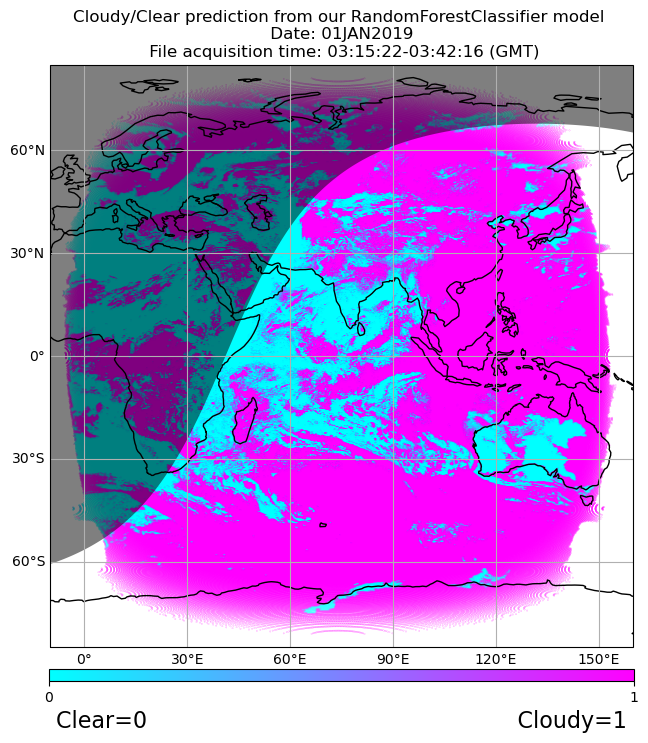

In [99]:
import matplotlib
import datetime
from cartopy.feature.nightshade import Nightshade

fig = plt.figure(figsize=(10,8))
extent = -1

ax = plt.axes(projection=ccrs.PlateCarree())
#plot = plt.scatter(dfday['longitude'][0:extent].values,dfday['latitude'][0:extent].values,c = dfday['prediction'][0:extent],cmap='jet_r',norm=matplotlib.colors.Normalize(vmin=0, vmax=1),transform=ccrs.PlateCarree(),s=0.01)
#plot = plt.scatter(dfnight['longitude'][0:extent].values,dfnight['latitude'][0:extent].values,c = dfnight['prediction'][0:extent],cmap='jet_r',norm=matplotlib.colors.Normalize(vmin=0, vmax=1),transform=ccrs.PlateCarree(),s=0.01)
plot = plt.scatter(dfpredictioncombined['longitude'][0:extent].values,
                   dfpredictioncombined['latitude'][0:extent].values,
                   c = dfpredictioncombined['prediction'][0:extent],
                   cmap='cool',norm=matplotlib.colors.Normalize(vmin=0, vmax=1),
                   transform=ccrs.PlateCarree(),s=0.01)


ax.set_global()

gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
#Set extent of the plot
ax.set_extent([-10,160,-85,85], crs=ccrs.PlateCarree())
#Assign blue to 1 and red to 0

year  = int(insatdate[-4:])
month_abbreviation = insatdate[2:5]
month_number = datetime.datetime.strptime(month_abbreviation, '%b').month
day   = int(insatdate[0:2])
hour  = int(insattime[:2])
minute = int(insattime[2:4])

date = datetime.datetime(year,month_number,day,hour,minute,second=0)

ax.add_feature(Nightshade(date, alpha=0.5))

cbar = plt.colorbar(plot, orientation='horizontal', pad=0.035, fraction=0.019, aspect=50,ticks=[0, 1])
cbar.set_label('Clear=0                                                    Cloudy=1', fontsize=16)

ax.coastlines()
plt.title('Cloudy/Clear prediction from our {} model \n Date: {} \n File acquisition time: {}-{} (GMT)'.format(type(model).__name__,insatdate,acqstart,acqend))
plt.show()
plt.show()

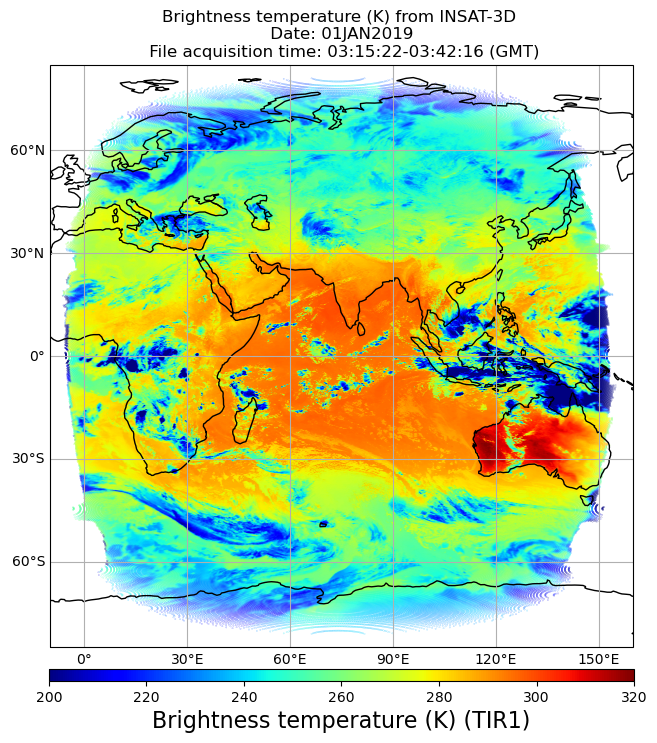

In [108]:
#Plot the bttir1 value on the map
fig = plt.figure(figsize=(10,8))
extent = -1

ax = plt.axes(projection=ccrs.PlateCarree())
plot = plt.scatter(dfpredictioncombined['longitude'][0:extent].values,
                   dfpredictioncombined['latitude'][0:extent].values,
                   c = dfpredictioncombined['bttir1'][0:extent],
                   cmap='jet',norm=matplotlib.colors.Normalize(vmin=200, vmax=320),
                     transform=ccrs.PlateCarree(),s=0.01)

gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
#Set extent of the plot
ax.set_extent([-10,160,-85,85], crs=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(plot, orientation='horizontal', pad=0.035, fraction=0.019, aspect=50)
cbar.set_label('Brightness temperature (K) (TIR1)', fontsize=16)
plt.title('Brightness temperature (K) from INSAT-3D \n Date: {} \n File acquisition time: {}-{} (GMT)'.format(insatdate,acqstart,acqend))
plt.show()


<KeysViewHDF5 ['CMK', 'GeoX', 'GeoY', 'Latitude', 'Longitude', 'time']>
(2816, 2805)
[ 0.  1. nan]


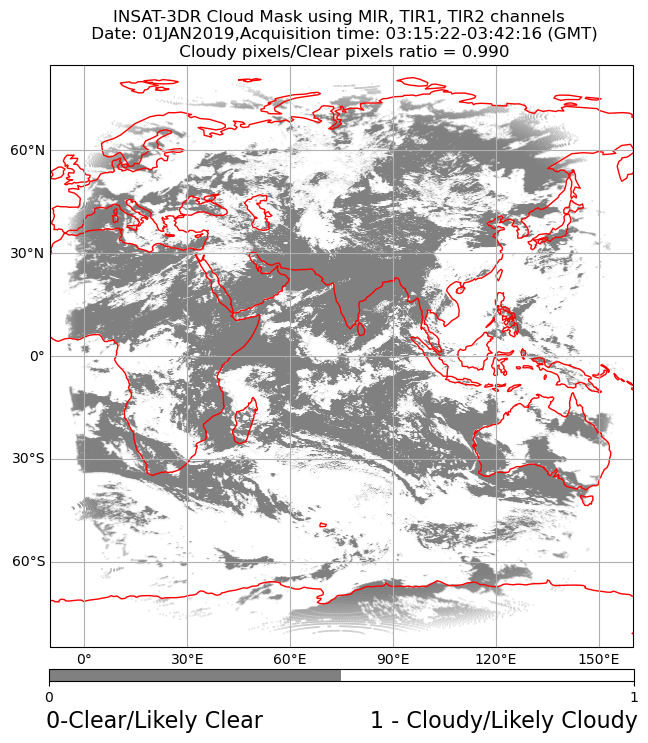

In [35]:
cmkfile = h5py.File(r'/data/debasish/insatdata/insat_cloud_mask/jan2019_day1_cmk/3RIMG_01JAN2019_0315_L2B_CMK_V01R00.h5','r')
print(cmkfile.keys())

cmk = np.array(cmkfile['CMK'],dtype=np.float32)[0,:,:]
cmkfill = cmkfile['CMK'].attrs['_FillValue'][0]
cmk[cmk == cmkfill] = np.nan
cmk [cmk==2] = 0
cmk [cmk==3] = 1
print(cmk.shape)
cmklat = np.array(cmkfile['Latitude'])/100
cmklon = np.array(cmkfile['Longitude'])/100
cmklatfill = cmkfile['Latitude'].attrs['_FillValue'][0]/100
cmklat [cmklat == cmklatfill] = np.nan
cmklon [cmklon == cmklatfill] = np.nan

insatdate = cmkfile.attrs['Acquisition_Date'].decode('utf-8')
insatstarttime = cmkfile.attrs['Acquisition_Start_Time'].decode('utf-8')
insatendtime = cmkfile.attrs['Acquisition_End_Time'].decode('utf-8')

acqstart = insatstarttime.split('T')[1]
acqend = insatendtime.split('T')[1]


print(np.unique(cmk))

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())

extent = -1
# plot = plt.scatter(cmklon.flatten()[0:extent],cmklat.flatten()[0:extent],
#                    c=cmk.flatten()[0:extent],cmap='hot',norm=matplotlib.colors.Normalize(vmin=0, vmax=1),
#                    transform=ccrs.PlateCarree(),s=0.01)
import matplotlib.colors as mcolors
cmap = mcolors.ListedColormap(['gray', 'white'])

# Define the custom normalization
#norm = mcolors.BoundaryNorm([0, 0.5, 1], cmap.N)

# Plot the scatter points with the custom colormap and normalization
plot = plt.scatter(cmklon.flatten()[0:extent], cmklat.flatten()[0:extent],
                   c=cmk.flatten()[0:extent], cmap=cmap,#, norm=norm,
                   transform=ccrs.PlateCarree(), s=0.01)

ax.set_global()
#Make coastline with red color
ax.coastlines(color = 'red')




gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

ax.set_extent([-10,160,-85,85], crs=ccrs.PlateCarree())
cbar = plt.colorbar(plot, orientation='horizontal', pad=0.035, fraction=0.019, aspect=50,ticks=[0, 1])
cbar.set_label('0-Clear/Likely Clear               1 - Cloudy/Likely Cloudy', fontsize=16)
cloudytoclearratio = len(cmk[cmk==1])/len(cmk[cmk==0])

plt.title('INSAT-3DR Cloud Mask using MIR, TIR1, TIR2 channels \n Date: {},Acquisition time: {}-{} (GMT)\n Cloudy pixels/Clear pixels ratio = {:.3f}'.format(insatdate,acqstart,acqend,cloudytoclearratio))
plt.show()

In [109]:
insatcmkdf = pd.DataFrame({'latitude':cmklat.flatten(),'longitude':cmklon.flatten(),'cmk':cmk.flatten()})
insatcmkdf = insatcmkdf.dropna()
print(insatcmkdf.shape)

(5760371, 3)


In [110]:
print(dfpredictioncombined.shape)

(5753176, 10)


In [112]:
common_locations = insatcmkdf.merge(dfpredictioncombined, on=['latitude', 'longitude'])[['latitude', 'longitude']]
pairs = common_locations.values.tolist()
print(type(pairs))
print(len(pairs))


<class 'list'>
5752146


In [120]:
pairs[0:5]

[[81.04, 66.28],
 [80.87, 66.69],
 [80.77, 67.03],
 [80.69, 67.35],
 [80.62, 67.65]]

In [150]:
dfday.index, dfnight.index

(Int64Index([ 357991,  357992,  357993,  357994,  357995,  360779,  360780,
              360781,  360782,  360783,
             ...
             7740417, 7740418, 7740419, 7740420, 7740421, 7740422, 7740423,
             7740424, 7740425, 7740426],
            dtype='int64', length=4637918),
 Int64Index([ 161258,  161259,  161260,  161261,  161262,  161263,  161264,
              161265,  161266,  161267,
             ...
             6976627, 6979432, 6979433, 6982238, 6982239, 6985045, 6987851,
             6990657, 6993464, 6996270],
            dtype='int64', length=1115258))

In [156]:
# dfday['old_index'] = dfday.index
# dfnight['old_index'] = dfnight.index

dfdayandnight = pd.concat([dfday, dfnight], axis=0)
print(len(dfdayandnight))

5753176


In [158]:
#Weed out duplicate values of the old_index column

dfdayandnight = dfdayandnight.drop_duplicates(subset='old_index', keep="first")
print(len(dfdayandnight))

#Sort the dataframe by the old_index column
dfdayandnight = dfdayandnight.sort_values(by=['old_index'])
#print(dfdayandnight.head())

5753176


In [157]:
dfdayandnight.columns

Index(['albedo', 'swirrad', 'btmir', 'bttir1', 'bttir2', 'solarelevation',
       'satelevation', 'longitude', 'latitude', 'prediction', 'old_index'],
      dtype='object')

In [159]:
#Check if the old_index column is sorted

dfdayandnight['old_index'].is_monotonic

True

In [160]:
print(len(insatcmkdf))

5760371


In [169]:
#How to make a dataframe from dfdayandnight and insatcmkdf based on the rows that have common [lat,lon] values

common_locations_lat = insatcmkdf.merge(dfdayandnight, on=['latitude', 'longitude'])['latitude'].values.tolist()
common_locations_lon = insatcmkdf.merge(dfdayandnight, on=['latitude', 'longitude'])['longitude'].values.tolist()

print(len(common_locations_lat))

5752146


In [168]:
pairs = common_locations_lat.values.tolist()
print(type(pairs))

pairs[0:5]

<class 'list'>


[81.04, 80.87, 80.77, 80.69, 80.62]

File read successfully
Prediction done


/tmp/ipykernel_4070404/1920947919.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfday['prediction'] = list(dayprediction)
/tmp/ipykernel_4070404/1920947919.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnight['prediction'] = list(nightprediction)
/tmp/ipykernel_4070404/1920947919.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

Plotting


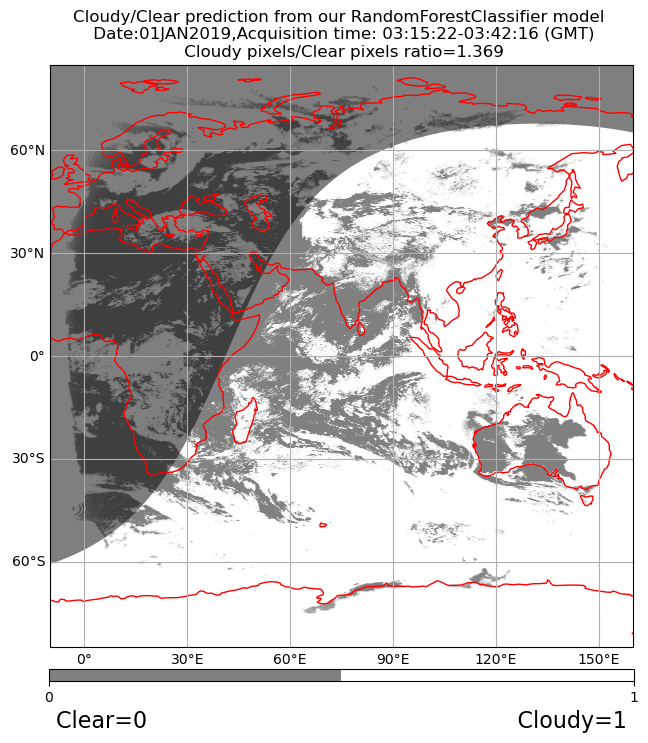

In [37]:
def model_output_func(insatfilepath, extent = -1):
    insatfile = h5py.File(insatfilepath,'r')

    longitudearray = np.array(insatfile['Longitude'])/100
    latitudearray = np.array(insatfile['Latitude'])/100
    fillvalue = insatfile['Longitude'].attrs['_FillValue'][0]/100
    latitudearray[latitudearray == fillvalue] = np.nan
    longitudearray[longitudearray == fillvalue] = np.nan

    insatdate = str(insatfile.attrs['Acquisition_Date'])[2:-1]
#    print(insatdate)
    insattime = str(insatfile.attrs['Acquisition_Time_in_GMT'])[2:-1]
#    print(insattime)
    acqstart = str(insatfile.attrs['Acquisition_Start_Time'])[2:-1].split('T')[1]
#    print(acqstart)
    acqend = str(insatfile.attrs['Acquisition_End_Time'])[2:-1].split('T')[1]
#    print(acqend)

    def count2bt(count,lut):
        bt = lut[count]
        return bt

    tir1count = np.array(insatfile['IMG_TIR1'])[0,:,:]
    fillvalue = insatfile['IMG_TIR1'].attrs['_FillValue'][0]
    tir1lut = np.array(insatfile['IMG_TIR1_TEMP'])
    tir1bt = count2bt(tir1count,tir1lut)
    tir1bt[tir1count == fillvalue] = np.nan

    tir2count = np.array(insatfile['IMG_TIR2'])[0,:,:]
    fillvalue = insatfile['IMG_TIR2'].attrs['_FillValue'][0]
    tir2lut = np.array(insatfile['IMG_TIR2_TEMP'])
    tir2bt = count2bt(tir2count,tir2lut)
    tir2bt[tir2count == fillvalue] = np.nan

    mircount = np.array(insatfile['IMG_MIR'])[0,:,:]
    fillvalue = insatfile['IMG_MIR'].attrs['_FillValue'][0]
    mirlut = np.array(insatfile['IMG_MIR_TEMP'])
    mirbt = count2bt(mircount,mirlut)
    mirbt[mircount == fillvalue] = np.nan

    swircount = np.array(insatfile['IMG_SWIR'])[0,:,:]
    fillvalue = insatfile['IMG_SWIR'].attrs['_FillValue'][0]
    swirlut = np.array(insatfile['IMG_SWIR_RADIANCE'])
    swirrad = count2bt(swircount,swirlut)
    swirrad[swircount == fillvalue] = np.nan

    viscount = np.array(insatfile['IMG_VIS'])[0,:,:]
    fillvalue = insatfile['IMG_VIS'].attrs['_FillValue'][0]
    vislut = np.array(insatfile['IMG_VIS_ALBEDO'])
    visalbedo = count2bt(viscount,vislut)
    visalbedo[viscount == fillvalue] = np.nan

    solarelevationarray = np.array(insatfile['Sun_Elevation'])[0,:,:]
    solarelevationarray = solarelevationarray/100
    fillvalue = insatfile['Sun_Elevation'].attrs['_FillValue'][0]/100
    solarelevationarray[solarelevationarray == fillvalue] = np.nan

    satelevationarray = np.array(insatfile['Sat_Elevation'])[0,:,:]
    satelevationarray = satelevationarray/100
    fillvalue = insatfile['Sat_Elevation'].attrs['_FillValue'][0]/100
    satelevationarray[satelevationarray == fillvalue] = np.nan
    print("File read successfully")

    swirraddown = swirrad[::4,::4]
    albedodown = visalbedo[::4,::4]

    dffullfile = pd.DataFrame({'albedo':albedodown.flatten(),'swirrad':swirraddown.flatten(),
                           'btmir':mirbt.flatten(),'bttir1':tir1bt.flatten(),'bttir2':tir2bt.flatten(),
                           'solarelevation':solarelevationarray.flatten(),'satelevation':satelevationarray.flatten(),
                           'longitude':longitudearray.flatten(),'latitude':latitudearray.flatten()})

    dffullfile.dropna(inplace=True)
    dfday = dffullfile[dffullfile['solarelevation'] > 0]
    #print(dfday.shape)
    dfnight = dffullfile[dffullfile['solarelevation'] <= 0]
    #print(dfnight.shape)

    dfdayfinal = dfday[['albedo','swirrad','btmir','bttir1','bttir2','solarelevation']]
    dfnightfinal = dfnight[['btmir','bttir1','bttir2','satelevation']]

    scaleradress = r'/data/debasish/cloudetectionmodels/cloudyornomodel/rfmodels/y79acc8d2msl5mss150est/trainscaler.pkl'
    modeladress = r'/data/debasish/cloudetectionmodels/cloudyornomodel/rfmodels/y79acc8d2msl5mss150est/randomforestclassifier.pkl'
    import joblib
    import pickle

    scaler = joblib.load(scaleradress)
    model = joblib.load(modeladress)

    dfdayscaled = scaler.transform(dfdayfinal)

    dayprediction = model.predict(dfdayscaled)

    scaleradress = r'/data/debasish/cloudetectionmodels/cloudyornomodel/rfmodels/ironlywithsatelevation/trainscaler.pkl'
    modeladress = r'/data/debasish/cloudetectionmodels/cloudyornomodel/rfmodels/ironlywithsatelevation/randomforestclassifier.pkl'

    scaler = joblib.load(scaleradress)
    model = joblib.load(modeladress)

    dfnightscaled = scaler.transform(dfnightfinal)

    nightprediction = model.predict(dfnightscaled)

    print("Prediction done")

    dfday['prediction'] = list(dayprediction)
    dfnight['prediction'] = list(nightprediction)
    dfday['oldindex'] = dfday.index
    dfnight['oldindex'] = dfnight.index
    dfpredictioncombined = pd.concat([dfday,dfnight])
    dfpredictioncombined.sort_values(by=['oldindex'],inplace=True)

    fig = plt.figure(figsize=(10,8))
    cmap = mcolors.ListedColormap(['gray', 'white'])
    print("Plotting")
    ax = plt.axes(projection=ccrs.PlateCarree())
    #plot = plt.scatter(dfday['longitude'][0:extent].values,dfday['latitude'][0:extent].values,c = dfday['prediction'][0:extent],cmap='jet_r',norm=matplotlib.colors.Normalize(vmin=0, vmax=1),transform=ccrs.PlateCarree(),s=0.01)
    #plot = plt.scatter(dfnight['longitude'][0:extent].values,dfnight['latitude'][0:extent].values,c = dfnight['prediction'][0:extent],cmap='jet_r',norm=matplotlib.colors.Normalize(vmin=0, vmax=1),transform=ccrs.PlateCarree(),s=0.01)
    plot = plt.scatter(dfpredictioncombined['longitude'][0:extent].values,
                    dfpredictioncombined['latitude'][0:extent].values,
                    c = dfpredictioncombined['prediction'][0:extent],
                    cmap=cmap,norm=matplotlib.colors.Normalize(vmin=0, vmax=1),
                    transform=ccrs.PlateCarree(),s=0.01)


    ax.set_global()

    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    #Set extent of the plot
    ax.set_extent([-10,160,-85,85], crs=ccrs.PlateCarree())
    #Assign blue to 1 and red to 0

    year  = int(insatdate[-4:])
    month_abbreviation = insatdate[2:5]
    month_number = datetime.datetime.strptime(month_abbreviation, '%b').month
    day   = int(insatdate[0:2])
    hour  = int(insattime[:2])
    minute = int(insattime[2:4])

    date = datetime.datetime(year,month_number,day,hour,minute,second=0)
    ax.add_feature(Nightshade(date, alpha=0.5))

    cbar = plt.colorbar(plot, orientation='horizontal', pad=0.035, fraction=0.019, aspect=50,ticks=[0, 1])
    cbar.set_label('Clear=0                                                    Cloudy=1', fontsize=16)
    cloudytoclearratio = len(dfpredictioncombined[dfpredictioncombined['prediction'] == 1])/len(dfpredictioncombined[dfpredictioncombined['prediction'] == 0])
    ax.coastlines(color = 'red')

    plt.title('Cloudy/Clear prediction from our {} model \n Date:{},Acquisition time: {}-{} (GMT)\n Cloudy pixels/Clear pixels ratio={:.3f}'.format(type(model).__name__,insatdate,acqstart,acqend,cloudytoclearratio))
    plt.show()

    return dfpredictioncombined


trialdataset = model_output_func(r'/data/debasish/insatdata/l1b/2019/2019jan/day01/3RIMG_01JAN2019_0315_L1B_STD_V01R00.h5',extent = -1)

File read successfully
Data being prepared for prediction
Data prepared for prediction, predicting now
Prediction done


/tmp/ipykernel_3943581/3489950991.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfday['prediction'] = list(dayprediction)
/tmp/ipykernel_3943581/3489950991.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnight['prediction'] = list(nightprediction)
/tmp/ipykernel_3943581/3489950991.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

Predicted dataframe shape is (5758363, 11)
Plotting


/home/debasish/anacondainstaller/ENTER/envs/py310/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


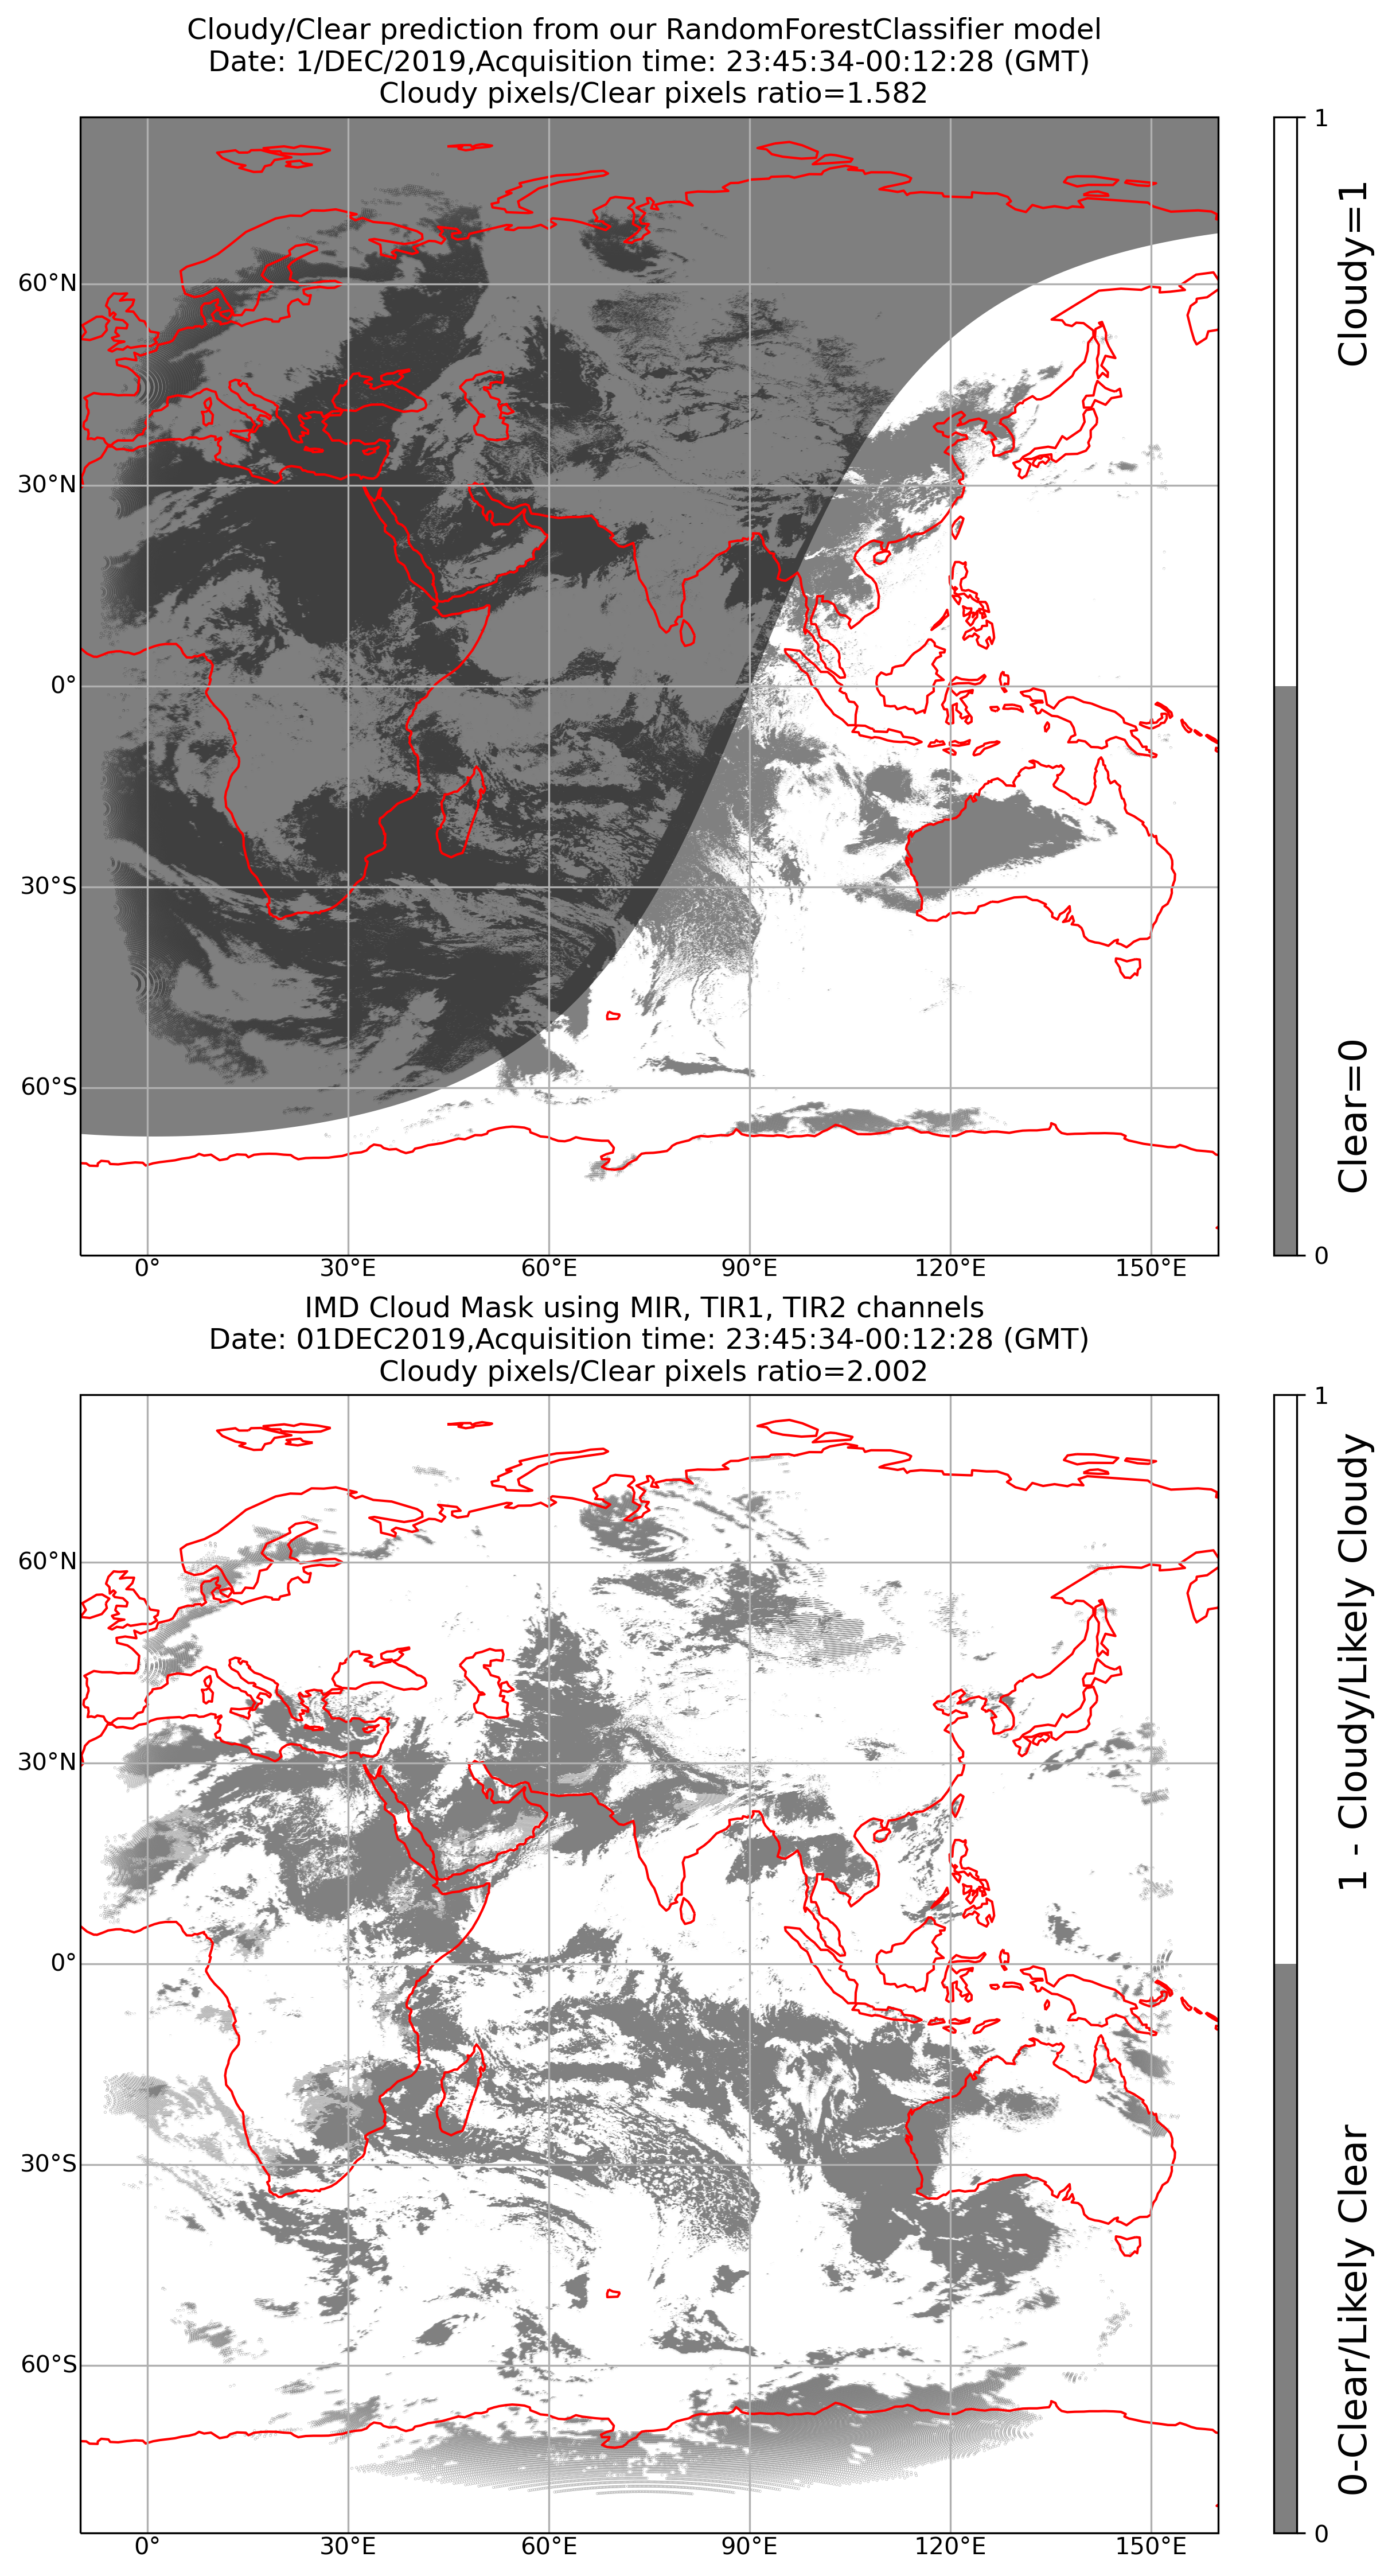

In [44]:
def model_mosdac_combined_plotter(insatfilepath,cmkfilepath, extent = -1):

    #fig, ax = plt.subplots(2, 1, figsize=(10, 15))
    #plt.show()

    os.path.exists(insatfilepath), "INSAT-1B file does not exist"
    os.path.exists(cmkfilepath), "CMK file does not exist"

    insatfile = h5py.File(insatfilepath,'r')
    cmkfile = h5py.File(cmkfilepath,'r')
    
    longitudearray = np.array(insatfile['Longitude'])/100
    latitudearray = np.array(insatfile['Latitude'])/100
    fillvalue = insatfile['Longitude'].attrs['_FillValue'][0]/100
    latitudearray[latitudearray == fillvalue] = np.nan
    longitudearray[longitudearray == fillvalue] = np.nan

    insatdate = str(insatfile.attrs['Acquisition_Date'])[2:-1]
    insattime = str(insatfile.attrs['Acquisition_Time_in_GMT'])[2:-1]
    acqstart = str(insatfile.attrs['Acquisition_Start_Time'])[2:-1].split('T')[1]
    acqend = str(insatfile.attrs['Acquisition_End_Time'])[2:-1].split('T')[1]

    def count2bt(count,lut):
        bt = lut[count]
        return bt

    tir1count = np.array(insatfile['IMG_TIR1'])[0,:,:]
    fillvalue = insatfile['IMG_TIR1'].attrs['_FillValue'][0]
    tir1lut = np.array(insatfile['IMG_TIR1_TEMP'])
    tir1bt = count2bt(tir1count,tir1lut)
    tir1bt[tir1count == fillvalue] = np.nan

    tir2count = np.array(insatfile['IMG_TIR2'])[0,:,:]
    fillvalue = insatfile['IMG_TIR2'].attrs['_FillValue'][0]
    tir2lut = np.array(insatfile['IMG_TIR2_TEMP'])
    tir2bt = count2bt(tir2count,tir2lut)
    tir2bt[tir2count == fillvalue] = np.nan

    mircount = np.array(insatfile['IMG_MIR'])[0,:,:]
    fillvalue = insatfile['IMG_MIR'].attrs['_FillValue'][0]
    mirlut = np.array(insatfile['IMG_MIR_TEMP'])
    mirbt = count2bt(mircount,mirlut)
    mirbt[mircount == fillvalue] = np.nan

    swircount = np.array(insatfile['IMG_SWIR'])[0,:,:]
    fillvalue = insatfile['IMG_SWIR'].attrs['_FillValue'][0]
    swirlut = np.array(insatfile['IMG_SWIR_RADIANCE'])
    swirrad = count2bt(swircount,swirlut)
    swirrad[swircount == fillvalue] = np.nan

    viscount = np.array(insatfile['IMG_VIS'])[0,:,:]
    fillvalue = insatfile['IMG_VIS'].attrs['_FillValue'][0]
    vislut = np.array(insatfile['IMG_VIS_ALBEDO'])
    visalbedo = count2bt(viscount,vislut)
    visalbedo[viscount == fillvalue] = np.nan

    solarelevationarray = np.array(insatfile['Sun_Elevation'])[0,:,:]
    solarelevationarray = solarelevationarray/100
    fillvalue = insatfile['Sun_Elevation'].attrs['_FillValue'][0]/100
    solarelevationarray[solarelevationarray == fillvalue] = np.nan

    satelevationarray = np.array(insatfile['Sat_Elevation'])[0,:,:]
    satelevationarray = satelevationarray/100
    fillvalue = insatfile['Sat_Elevation'].attrs['_FillValue'][0]/100
    satelevationarray[satelevationarray == fillvalue] = np.nan
    print("File read successfully")

    swirraddown = swirrad[::4,::4]
    albedodown = visalbedo[::4,::4]

    print("Data being prepared for prediction")
    dffullfile = pd.DataFrame({'albedo':albedodown.flatten(),'swirrad':swirraddown.flatten(),
                           'btmir':mirbt.flatten(),'bttir1':tir1bt.flatten(),'bttir2':tir2bt.flatten(),
                           'solarelevation':solarelevationarray.flatten(),'satelevation':satelevationarray.flatten(),
                           'longitude':longitudearray.flatten(),'latitude':latitudearray.flatten()})

    dffullfile.dropna(inplace=True)
    dfday = dffullfile[dffullfile['solarelevation'] > 0]
    dfnight = dffullfile[dffullfile['solarelevation'] <= 0]

    dfdayfinal = dfday[['albedo','swirrad','btmir','bttir1','bttir2','solarelevation']]
    dfnightfinal = dfnight[['btmir','bttir1','bttir2','satelevation']]

    print("Data prepared for prediction, predicting now")
    scaleradress = r'/data/debasish/cloudetectionmodels/cloudyornomodel/rfmodels/y79acc8d2msl5mss150est/trainscaler.pkl'
    modeladress = r'/data/debasish/cloudetectionmodels/cloudyornomodel/rfmodels/y79acc8d2msl5mss150est/randomforestclassifier.pkl'
    import joblib
    import pickle

    scaler = joblib.load(scaleradress)
    model = joblib.load(modeladress)

    dfdayscaled = scaler.transform(dfdayfinal)

    dayprediction = model.predict(dfdayscaled)

    scaleradress = r'/data/debasish/cloudetectionmodels/cloudyornomodel/rfmodels/ironlywithsatelevation/trainscaler.pkl'
    modeladress = r'/data/debasish/cloudetectionmodels/cloudyornomodel/rfmodels/ironlywithsatelevation/randomforestclassifier.pkl'

    scaler = joblib.load(scaleradress)
    model = joblib.load(modeladress)

    dfnightscaled = scaler.transform(dfnightfinal)
    nightprediction = model.predict(dfnightscaled)

    print("Prediction done")


    dfday['prediction'] = list(dayprediction)
    dfnight['prediction'] = list(nightprediction)
    dfday['oldindex'] = dfday.index
    dfnight['oldindex'] = dfnight.index
    dfpredictioncombined = pd.concat([dfday,dfnight])
    dfpredictioncombined.sort_values(by=['oldindex'],inplace=True)
    print("Predicted dataframe shape is {}".format(dfpredictioncombined.shape))
    cmap = mcolors.ListedColormap(['gray', 'white'])



    year_insat  = int(insatdate[-4:])
    month_abbreviation_insat = insatdate[2:5]
    month_number_insat = datetime.datetime.strptime(month_abbreviation_insat, '%b').month
    day_insat   = int(insatdate[0:2])
    hour_insat  = int(insattime[:2])
    minute_insat = int(insattime[2:4])
    insatdate = str(day_insat)+'/'+month_abbreviation_insat+'/'+str(year_insat)
    acqstart = str(insatfile.attrs['Acquisition_Start_Time'])[2:-1].split('T')[1]
    acqend = str(insatfile.attrs['Acquisition_End_Time'])[2:-1].split('T')[1]
    date = datetime.datetime(year_insat,month_number_insat,day_insat,hour_insat,minute_insat,second=0)


    insatdate_cmk = cmkfile.attrs['Acquisition_Date'].decode('utf-8')
    insatstarttime_cmk = cmkfile.attrs['Acquisition_Start_Time'].decode('utf-8')
    insatendtime_cmk = cmkfile.attrs['Acquisition_End_Time'].decode('utf-8')
    acqstart_cmk = insatstarttime_cmk.split('T')[1]
    acqend_cmk = insatendtime_cmk.split('T')[1]
    year_cmk = int(insatdate_cmk[-4:])
    month_abbreviation_cmk = insatdate_cmk[2:5]
    month_number_cmk = datetime.datetime.strptime(month_abbreviation_cmk, "%b").month
    day_cmk = int(insatdate_cmk[:2])
    hour_cmk = int(acqstart_cmk[:2])
    minute_cmk = int(acqstart_cmk[3:5])
    second_cmk = int(acqstart_cmk[-2:])
    date_cmk = datetime.datetime(year_cmk,month_number_cmk,day_cmk,hour_cmk,minute_cmk,second_cmk)

    assert date_cmk.date() == date.date(), "CMK and INSAT-3DR data are not from the same date"
    assert abs(date_cmk-date) <= datetime.timedelta(minutes = 35), "CMK and INSAT-3DR data are not from the same time"

    print("Plotting")

    fig = plt.figure(figsize=(10,15),dpi=300)
    # title = fig.suptitle('INSAT-3DR cloud mask and our cloud mask comparison',fontsize=14,fontweight='bold',y = 0.98)
    # title.set_ha("center")

    ax1 = plt.subplot(2,1,1,projection = ccrs.PlateCarree())
    ax2 = plt.subplot(2,1,2,projection = ccrs.PlateCarree())

    cmap = mcolors.ListedColormap(['gray', 'white'])
    plot1 = ax1.scatter(dfpredictioncombined['longitude'][0:extent].values,
                    dfpredictioncombined['latitude'][0:extent].values,
                    c = dfpredictioncombined['prediction'][0:extent],
                    cmap=cmap,
                    #norm=matplotlib.colors.Normalize(vmin=0, vmax=1),
                    transform=ccrs.PlateCarree(),s=0.01)

    ax1.set_global()
    gl = ax1.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.right_labels = False
    ax1.set_extent([-10,160,-85,85], crs=ccrs.PlateCarree())

    ax1.add_feature(Nightshade(date, alpha=0.5))

    cbar1 = plt.colorbar(plot1, orientation='vertical', pad=0.035, fraction=0.019, aspect=50,ticks=[0, 1],ax=ax1)
    cbar1.set_label('Clear=0                                                       Cloudy=1', fontsize=16)

    cloudytoclearratioinsat = len(dfpredictioncombined[dfpredictioncombined['prediction'] == 1])/len(dfpredictioncombined[dfpredictioncombined['prediction'] == 0])
    ax1.coastlines(color = 'red')
    ax1.set_title('Cloudy/Clear prediction from our {} model \n Date: {},Acquisition time: {}-{} (GMT) \n Cloudy pixels/Clear pixels ratio={:.3f}'.format(type(model).__name__,insatdate,acqstart,acqend,cloudytoclearratioinsat))



    cmk = np.array(cmkfile['CMK'],dtype=np.float32)[0,:,:]
    cmkfill = cmkfile['CMK'].attrs['_FillValue'][0]
    cmk[cmk == cmkfill] = np.nan
    cmk [cmk==2] = 0
    cmk [cmk==3] = 1
    cmklat = np.array(cmkfile['Latitude'])/100
    cmklon = np.array(cmkfile['Longitude'])/100
    cmklatfill = cmkfile['Latitude'].attrs['_FillValue'][0]/100
    cmklat [cmklat == cmklatfill] = np.nan
    cmklon [cmklon == cmklatfill] = np.nan

    
    plot2 = ax2.scatter(cmklon.flatten()[0:extent], cmklat.flatten()[0:extent],
                   c=cmk.flatten()[0:extent], cmap=cmap,#, norm=norm,
                   transform=ccrs.PlateCarree(), s=0.01)

    ax2.set_global()
    gl = ax2.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.right_labels = False
    ax2.set_extent([-10,160,-85,85], crs=ccrs.PlateCarree())
    ax2.coastlines(color = 'red')
    cbar2 = plt.colorbar(plot2, orientation='vertical', pad=0.035, fraction=0.019, aspect=50,ticks=[0, 1],ax=ax2)
    cbar2.set_label('0-Clear/Likely Clear                   1 - Cloudy/Likely Cloudy', fontsize=16)    
    #Rotate the tick labels
    cloudytoclearratiocmk = len(cmk[cmk==1])/len(cmk[cmk==0])
    ax2.set_title('IMD Cloud Mask using MIR, TIR1, TIR2 channels \n Date: {},Acquisition time: {}-{} (GMT) \n Cloudy pixels/Clear pixels ratio={:.3f}'.format(insatdate_cmk,
                                                                                                                                                                    acqstart_cmk,
                                                                                                                                                                    acqend_cmk,
                                                                                                                                                                    cloudytoclearratiocmk))
    #Figure title

    fig.tight_layout()

    plt.show()
    return cloudytoclearratioinsat,cloudytoclearratiocmk
model_mosdac_combined_plotter(r'/data/debasish/insatdata/l1b/2019/dec2019_day1_std/3RIMG_01DEC2019_2345_L1B_STD_V01R00.h5',
                              r'/data/debasish/insatdata/2019_insat_cmk/dec2019_day1_cmk/3RIMG_01DEC2019_2345_L2B_CMK_V01R00.h5',
                              extent = -1);


In [11]:
cmkfilepath = r'/data/debasish/insatdata/2019_insat_cmk/jan2019_day1_cmk/3RIMG_01JAN2019_0345_L2B_CMK_V01R00.h5'
cmkfile = h5py.File(cmkfilepath,'r')

insatdate_cmk = cmkfile.attrs['Acquisition_Date'].decode('utf-8')
insatstarttime_cmk = cmkfile.attrs['Acquisition_Start_Time'].decode('utf-8')
insatendtime_cmk = cmkfile.attrs['Acquisition_End_Time'].decode('utf-8')
acqstart_cmk = insatstarttime_cmk.split('T')[1]
acqend_cmk = insatendtime_cmk.split('T')[1]

print(insatdate_cmk,acqstart_cmk,acqend_cmk)

year_cmk = int(insatdate_cmk[-4:])
month_abbreviation_cmk = insatdate_cmk[2:5]
month_number_cmk = datetime.datetime.strptime(month_abbreviation_cmk, "%b").month
day_cmk = int(insatdate_cmk[:2])
hour_cmk = int(acqstart_cmk[:2])
minute_cmk = int(acqstart_cmk[3:5])
second_cmk = int(acqstart_cmk[-2:])
print(year_cmk,month_number_cmk,day_cmk,hour_cmk,minute_cmk,second_cmk)
date_cmk = datetime.datetime(year_cmk,month_number_cmk,day_cmk,hour_cmk,minute_cmk,second_cmk)

print(date_cmk.date())

01JAN2019 03:45:23 04:12:17
2019 1 1 3 45 23
2019-01-01


In [16]:
#How to find the time difference between two datetime objects

datetime1 = datetime.datetime(2019,1,1,3,15,0)
datetime2 = datetime.datetime(2019,1,1,3,45,2)

print(datetime2-datetime1)

#If the difference is more than 30 minutes, raise an error

assert abs(datetime1-datetime2) <= datetime.timedelta(minutes=30), "INSAT-3DR and CMK data are not from the same time"

#Assertion test passed

0:30:02


AssertionError: INSAT-3DR and CMK data are not from the same time